In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
##for the purpose of data visulaization we would be using a non-scaled data to properly depict the values..but in later stages
##for  some analyis purpose we would be using the scalar on a new data set

In [3]:
RealEstate_dataframe=pd.read_csv("Real_estatedf_unique.csv")

In [4]:
RealEstate_dataframe.shape

(27161, 80)

In [5]:
RealEstate_dataframe.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [6]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [7]:
%matplotlib inline

Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and 
percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [8]:
len(RealEstate_dataframe['place'].value_counts())

9912

In [9]:
RealEstate_dataframe.isna()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27157,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27158,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27159,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
RealEstate_dataframe.isna().sum()

UID                0
BLOCKID        27161
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          207
married          150
married_snp      150
separated        150
divorced         150
Length: 80, dtype: int64

In [11]:
Real_Estate_obj= ['state', 'state_ab', 'city', 'place', 'type', 'primary']

In [12]:
RealEstate_dataframe['primary'].isnull().value_counts()

False    27161
Name: primary, dtype: int64

In [13]:
Real_Estate_numerical =pd.read_csv('numerical_dfREalEstate.csv');

In [14]:
Real_Estate_numerical

,UID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,140,53,36,13346,315,42.840812,-75.501524,2.021834e+08,1699120,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,140,141,18,46616,574,41.701441,-86.266614,1.560828e+06,100363,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,140,63,18,46122,317,39.792202,-86.515246,6.956160e+07,284193,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,140,127,72,927,787,18.396103,-66.104169,1.105793e+06,0,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,140,161,20,66502,785,39.195573,-96.569366,2.554403e+06,0,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,279212,140,43,72,769,787,18.076060,-66.358379,6.970300e+05,0,...,42.73154,40.16667,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683
27157,277856,140,91,42,19422,215,40.158138,-75.307271,5.077337e+06,11786,...,38.21269,39.50000,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888
27158,233000,140,87,8,80653,970,40.410316,-103.814003,1.323262e+09,17577610,...,43.40218,46.33333,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712
27159,287425,140,439,48,76034,817,32.904866,-97.162151,1.865230e+07,158882,...,39.25921,43.41667,21.36235,1373.94120,5815.0,0.93970,0.75503,0.02287,0.00915,0.05261


In [15]:
Real_Estate_numerical.drop(['COUNTYID','STATEID','zip_code','area_code'],axis=1,inplace=True)

In [16]:
Real_Estate_numerical

,UID,SUMLEVEL,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,140,42.840812,-75.501524,2.021834e+08,1699120,5230,2612,2618,769.38638,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,140,41.701441,-86.266614,1.560828e+06,100363,2633,1349,1284,804.87924,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,140,39.792202,-86.515246,6.956160e+07,284193,6881,3643,3238,742.77365,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,140,18.396103,-66.104169,1.105793e+06,0,2700,1141,1559,803.42018,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,140,39.195573,-96.569366,2.554403e+06,0,5637,2586,3051,938.56493,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,279212,140,18.076060,-66.358379,6.970300e+05,0,1847,909,938,439.42839,...,42.73154,40.16667,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683
27157,277856,140,40.158138,-75.307271,5.077337e+06,11786,4155,2116,2039,1813.19253,...,38.21269,39.50000,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888
27158,233000,140,40.410316,-103.814003,1.323262e+09,17577610,2829,1465,1364,849.39107,...,43.40218,46.33333,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712
27159,287425,140,32.904866,-97.162151,1.865230e+07,158882,11542,5727,5815,1972.45746,...,39.25921,43.41667,21.36235,1373.94120,5815.0,0.93970,0.75503,0.02287,0.00915,0.05261


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

from sklearn.impute import SimpleImputer

In [18]:
Real_Estate_numerical_test=Real_Estate_numerical.copy()

# We will use mean imputaion for second_mortagage

In [19]:



Real_Estate_numerical['second_mortgage'].median()

0.02256

In [20]:
Real_Estate_numerical['second_mortgage'].head()

0    0.02077
1    0.02222
2    0.00000
3    0.01086
4    0.05426
Name: second_mortgage, dtype: float64

In [21]:
def median_imputer(df,variable):
    median_value=df[variable].median()
    df[variable+"_median"]=df[variable].fillna(median_value)
    

In [22]:
median_imputer(Real_Estate_numerical,'second_mortgage')

In [23]:
Real_Estate_numerical['second_mortgage'].isnull().value_counts()

False    26801
True       360
Name: second_mortgage, dtype: int64

In [24]:
Real_Estate_numerical['home_equity'].isnull().value_counts()

False    26801
True       360
Name: home_equity, dtype: int64

In [25]:
median_imputer(Real_Estate_numerical,'home_equity')

In [26]:
median_imputer(Real_Estate_numerical,'debt')

In [27]:
median_imputer(Real_Estate_numerical,'home_equity')

In [28]:
median_imputer(Real_Estate_numerical,'home_equity')

In [29]:
Real_Estate_numerical['home_equity_median'].isnull().value_counts()

False    27161
Name: home_equity_median, dtype: int64

In [30]:
Real_Estate_numerical['hc_mortgage_mean'].isnull().value_counts()

False    26719
True       442
Name: hc_mortgage_mean, dtype: int64

In [31]:
Real_Estate_numerical['hc_mean'].isnull().value_counts()

False    26683
True       478
Name: hc_mean, dtype: int64

In [32]:
Real_Estate_numerical['lat'].isnull().value_counts()

False    27161
Name: lat, dtype: int64

In [33]:
Real_Estate_numerical.drop('home_equity_median',axis=1,inplace=True)

In [34]:
# Real_Estate_numerical

In [35]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=7)
df_knnimputed=imputer.fit_transform(Real_Estate_numerical)

In [36]:
knnFinalImpuatedData = pd.DataFrame(df_knnimputed,columns = Real_Estate_numerical.columns)

In [37]:
knnFinalImpuatedData.shape

(27161, 71)

In [38]:
knnFinalImpuatedData

,UID,SUMLEVEL,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,...,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,second_mortgage_median,debt_median
0,267822.0,140.0,42.840812,-75.501524,2.021834e+08,1699120.0,5230.0,2612.0,2618.0,769.38638,...,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.02077,0.52963
1,246444.0,140.0,41.701441,-86.266614,1.560828e+06,100363.0,2633.0,1349.0,1284.0,804.87924,...,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.02222,0.60855
2,245683.0,140.0,39.792202,-86.515246,6.956160e+07,284193.0,6881.0,3643.0,3238.0,742.77365,...,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.00000,0.73484
3,279653.0,140.0,18.396103,-66.104169,1.105793e+06,0.0,2700.0,1141.0,1559.0,803.42018,...,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086,0.52714
4,247218.0,140.0,39.195573,-96.569366,2.554403e+06,0.0,5637.0,2586.0,3051.0,938.56493,...,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426,0.51938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,279212.0,140.0,18.076060,-66.358379,6.970300e+05,0.0,1847.0,909.0,938.0,439.42839,...,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683,0.00000,0.11694
27157,277856.0,140.0,40.158138,-75.307271,5.077337e+06,11786.0,4155.0,2116.0,2039.0,1813.19253,...,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888,0.02112,0.65364
27158,233000.0,140.0,40.410316,-103.814003,1.323262e+09,17577610.0,2829.0,1465.0,1364.0,849.39107,...,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712,0.02024,0.58095
27159,287425.0,140.0,32.904866,-97.162151,1.865230e+07,158882.0,11542.0,5727.0,5815.0,1972.45746,...,21.36235,1373.94120,5815.0,0.93970,0.75503,0.02287,0.00915,0.05261,0.07550,0.65722


In [39]:
RealEstate_dataframe.head(3)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657


In [40]:
RealEstate_dataframe['state'].isnull().value_counts()

False    27161
Name: state, dtype: int64

In [41]:
RealEstate_dataframe['BLOCKID'].isnull().value_counts()

True    27161
Name: BLOCKID, dtype: int64

In [42]:
variables_df=['UID','COUNTYID','COUNTYID','STATEID','state','state_ab','city','place','type']

In [43]:
def variable_joiner(df1,df2,variables_arr):
    
    for variable in variables_arr:
        df1[variable]=df2[variable]
    

In [44]:
 # variable_joiner(knnFinalImpuatedData,RealEstate_dataframe,variable)

In [45]:
variable_joiner(knnFinalImpuatedData,RealEstate_dataframe,variables_df)

In [46]:
knnFinalImpuatedData

,UID,SUMLEVEL,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,...,divorced,second_mortgage_median,debt_median,COUNTYID,STATEID,state,state_ab,city,place,type
0,267822,140.0,42.840812,-75.501524,2.021834e+08,1699120.0,5230.0,2612.0,2618.0,769.38638,...,0.08770,0.02077,0.52963,53,36,New York,NY,Hamilton,Hamilton,City
1,246444,140.0,41.701441,-86.266614,1.560828e+06,100363.0,2633.0,1349.0,1284.0,804.87924,...,0.09030,0.02222,0.60855,141,18,Indiana,IN,South Bend,Roseland,City
2,245683,140.0,39.792202,-86.515246,6.956160e+07,284193.0,6881.0,3643.0,3238.0,742.77365,...,0.10657,0.00000,0.73484,63,18,Indiana,IN,Danville,Danville,City
3,279653,140.0,18.396103,-66.104169,1.105793e+06,0.0,2700.0,1141.0,1559.0,803.42018,...,0.10106,0.01086,0.52714,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban
4,247218,140.0,39.195573,-96.569366,2.554403e+06,0.0,5637.0,2586.0,3051.0,938.56493,...,0.03109,0.05426,0.51938,161,20,Kansas,KS,Manhattan,Manhattan City,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,279212,140.0,18.076060,-66.358379,6.970300e+05,0.0,1847.0,909.0,938.0,439.42839,...,0.14683,0.00000,0.11694,43,72,Puerto Rico,PR,Coamo,Coamo,Urban
27157,277856,140.0,40.158138,-75.307271,5.077337e+06,11786.0,4155.0,2116.0,2039.0,1813.19253,...,0.04888,0.02112,0.65364,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough
27158,233000,140.0,40.410316,-103.814003,1.323262e+09,17577610.0,2829.0,1465.0,1364.0,849.39107,...,0.07712,0.02024,0.58095,87,8,Colorado,CO,Weldona,Saddle Ridge,City
27159,287425,140.0,32.904866,-97.162151,1.865230e+07,158882.0,11542.0,5727.0,5815.0,1972.45746,...,0.05261,0.07550,0.65722,439,48,Texas,TX,Colleyville,Colleyville City,Town


In [47]:
##now after imputatio we will perform build a map

In [48]:

import geopandas as gpd


In [49]:
knnFinalImpuatedData

,UID,SUMLEVEL,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,...,divorced,second_mortgage_median,debt_median,COUNTYID,STATEID,state,state_ab,city,place,type
0,267822,140.0,42.840812,-75.501524,2.021834e+08,1699120.0,5230.0,2612.0,2618.0,769.38638,...,0.08770,0.02077,0.52963,53,36,New York,NY,Hamilton,Hamilton,City
1,246444,140.0,41.701441,-86.266614,1.560828e+06,100363.0,2633.0,1349.0,1284.0,804.87924,...,0.09030,0.02222,0.60855,141,18,Indiana,IN,South Bend,Roseland,City
2,245683,140.0,39.792202,-86.515246,6.956160e+07,284193.0,6881.0,3643.0,3238.0,742.77365,...,0.10657,0.00000,0.73484,63,18,Indiana,IN,Danville,Danville,City
3,279653,140.0,18.396103,-66.104169,1.105793e+06,0.0,2700.0,1141.0,1559.0,803.42018,...,0.10106,0.01086,0.52714,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban
4,247218,140.0,39.195573,-96.569366,2.554403e+06,0.0,5637.0,2586.0,3051.0,938.56493,...,0.03109,0.05426,0.51938,161,20,Kansas,KS,Manhattan,Manhattan City,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,279212,140.0,18.076060,-66.358379,6.970300e+05,0.0,1847.0,909.0,938.0,439.42839,...,0.14683,0.00000,0.11694,43,72,Puerto Rico,PR,Coamo,Coamo,Urban
27157,277856,140.0,40.158138,-75.307271,5.077337e+06,11786.0,4155.0,2116.0,2039.0,1813.19253,...,0.04888,0.02112,0.65364,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough
27158,233000,140.0,40.410316,-103.814003,1.323262e+09,17577610.0,2829.0,1465.0,1364.0,849.39107,...,0.07712,0.02024,0.58095,87,8,Colorado,CO,Weldona,Saddle Ridge,City
27159,287425,140.0,32.904866,-97.162151,1.865230e+07,158882.0,11542.0,5727.0,5815.0,1972.45746,...,0.05261,0.07550,0.65722,439,48,Texas,TX,Colleyville,Colleyville City,Town


In [50]:
knnFinalImpuatedData_copy=knnFinalImpuatedData.copy()



In [51]:
knnFinalImpuatedData_copy.sort_values("second_mortgage", axis = 0, ascending = False, 
                 inplace = True) 
  

In [52]:
import geopandas
import matplotlib.pyplot as plt

In [53]:
gdf_new1 = geopandas.GeoDataFrame(knnFinalImpuatedData_copy, geometry=geopandas.points_from_xy(knnFinalImpuatedData_copy.lng, knnFinalImpuatedData_copy.lat))

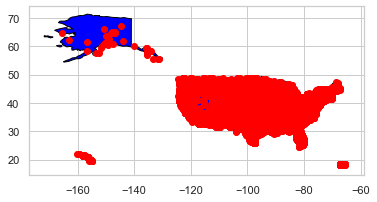

In [54]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


ax = world[world.name== 'United States of America'].plot(color ='blue', edgecolor='black')

gdf_new1.plot(ax=ax, color='red')

plt.show()

In [55]:
knnFinalImpuatedData['Bad_debt']=knnFinalImpuatedData['second_mortgage'] + knnFinalImpuatedData['home_equity'] - knnFinalImpuatedData['home_equity_second_mortgage']

In [56]:

knnFinalImpuatedData['Bad_debt']

0        0.09408
1        0.04274
2        0.09512
3        0.01086
4        0.05426
          ...   
27156    0.00000
27157    0.20908
27158    0.07857
27159    0.14305
27160    0.18362
Name: Bad_debt, Length: 27161, dtype: float64

In [57]:

pie_chart_labels = ['Bad_debt', 'debt']


In [58]:
pie_chart_df=knnFinalImpuatedData[pie_chart_labels]

In [59]:
total_Baddebt=sum(pie_chart_df['Bad_debt'])

In [60]:
total_debt=sum(pie_chart_df['debt'])

In [61]:
pie_chart_df

,Bad_debt,debt
0,0.09408,0.52963
1,0.04274,0.60855
2,0.09512,0.73484
3,0.01086,0.52714
4,0.05426,0.51938
...,...,...
27156,0.00000,0.11694
27157,0.20908,0.65364
27158,0.07857,0.58095
27159,0.14305,0.65722


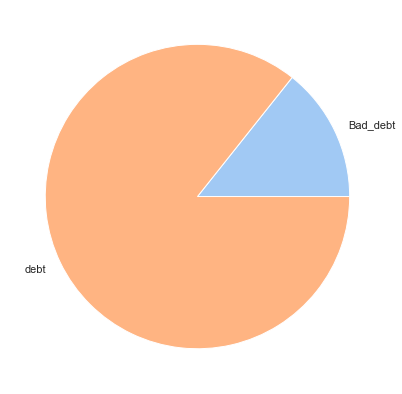

In [62]:





# Creating dataset 
cars = ['AUDI', 'BMW', 'FORD', 
        'TESLA', 'JAGUAR', 'MERCEDES'] 
data=[2854,17093]
pie_chart_labels

  
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = pie_chart_labels) 
  
# show plot 
plt.show() 

In [63]:
knnFinalImpuatedData['good_debt']=knnFinalImpuatedData['debt']-knnFinalImpuatedData['Bad_debt']

In [64]:
knnFinalImpuatedData

,UID,SUMLEVEL,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,...,debt_median,COUNTYID,STATEID,state,state_ab,city,place,type,Bad_debt,good_debt
0,267822,140.0,42.840812,-75.501524,2.021834e+08,1699120.0,5230.0,2612.0,2618.0,769.38638,...,0.52963,53,36,New York,NY,Hamilton,Hamilton,City,0.09408,0.43555
1,246444,140.0,41.701441,-86.266614,1.560828e+06,100363.0,2633.0,1349.0,1284.0,804.87924,...,0.60855,141,18,Indiana,IN,South Bend,Roseland,City,0.04274,0.56581
2,245683,140.0,39.792202,-86.515246,6.956160e+07,284193.0,6881.0,3643.0,3238.0,742.77365,...,0.73484,63,18,Indiana,IN,Danville,Danville,City,0.09512,0.63972
3,279653,140.0,18.396103,-66.104169,1.105793e+06,0.0,2700.0,1141.0,1559.0,803.42018,...,0.52714,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,0.01086,0.51628
4,247218,140.0,39.195573,-96.569366,2.554403e+06,0.0,5637.0,2586.0,3051.0,938.56493,...,0.51938,161,20,Kansas,KS,Manhattan,Manhattan City,City,0.05426,0.46512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,279212,140.0,18.076060,-66.358379,6.970300e+05,0.0,1847.0,909.0,938.0,439.42839,...,0.11694,43,72,Puerto Rico,PR,Coamo,Coamo,Urban,0.00000,0.11694
27157,277856,140.0,40.158138,-75.307271,5.077337e+06,11786.0,4155.0,2116.0,2039.0,1813.19253,...,0.65364,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough,0.20908,0.44456
27158,233000,140.0,40.410316,-103.814003,1.323262e+09,17577610.0,2829.0,1465.0,1364.0,849.39107,...,0.58095,87,8,Colorado,CO,Weldona,Saddle Ridge,City,0.07857,0.50238
27159,287425,140.0,32.904866,-97.162151,1.865230e+07,158882.0,11542.0,5727.0,5815.0,1972.45746,...,0.65722,439,48,Texas,TX,Colleyville,Colleyville City,Town,0.14305,0.51417


In [65]:
# group_by_cities=knnFinalImpuatedData.groupby("city")["Bad_debt","good_debt","second_mortgage","home_equity"].mean()

In [66]:
# group_by_cities=group_by_cities.transpose()

In [67]:
# group_by_cities

In [68]:
# knnFinalImpuatedData['city'].value_counts()

In [69]:
# indexs_toselect=np.where(knnFinalImpuatedData['city'] == 'Abbeville')

In [70]:
# indexs_toselect=np.where(knnFinalImpuatedData['city'] == 'Abbeville')

In [71]:
# indexs_toselect=np.where(knnFinalImpuatedData['city'] == 'Abbeville')

In [72]:
# indexs_toselect=np.where(knnFinalImpuatedData['city'] == 'Abbeville')

In [73]:
# series1=knnFinalImpuatedData.iloc[1708]
# series2=knnFinalImpuatedData.iloc[4511]
# series3=knnFinalImpuatedData.iloc[11433]
# series4=knnFinalImpuatedData.iloc[18963]
# series5=knnFinalImpuatedData.iloc[26054]
# series6=knnFinalImpuatedData.iloc[26348]
# series7=knnFinalImpuatedData.iloc[27024]

# result_2=pd.concat([series1,series2,series3,series4,series5,series6 ,series7], axis=1).transpose()


In [74]:
# knnFinalImpuatedData[]

In [75]:
knnFinalImpuatedData['city'].value_counts().sort_values(ascending=False).head(5)


Chicago         292
Brooklyn        278
Los Angeles     236
Houston         219
Philadelphia    163
Name: city, dtype: int64

In [76]:

# data_1 = result_2['second_mortgage']
# data_2 = result_2['home_equity']
# data_3 = result_2['good_debt']
# data_4 = result_2['Bad_debt']
# data = [data_1, data_2, data_3, data_4] 
# fig = plt.figure(figsize =(10, 7)) 
# # Creating axes instance 
# ax = fig.add_axes([0, 0, 1, 1]) 
# # Creating plot 
# bp = ax.boxplot(data) 

# # show plot 
# plt.show() 

C:\Users\athan\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, ' second_mortgage Box plot distribution')

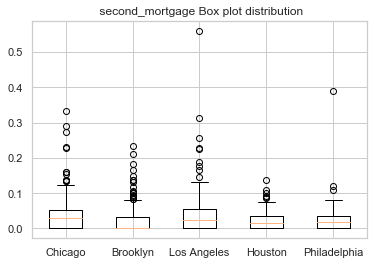

In [77]:
Chicago = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Chicago']['second_mortgage']
Brooklyn = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Brooklyn']['second_mortgage']
Los_Angeles = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Los Angeles']['second_mortgage']
Houston = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Houston']['second_mortgage']
Philadelphia = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Philadelphia']['second_mortgage']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([Chicago,Brooklyn,Los_Angeles,Houston,Philadelphia], labels=['Chicago', 'Brooklyn','Los Angeles','Houston','Philadelphia'])
plt.title(" second_mortgage Box plot distribution")


C:\Users\athan\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, ' home_equity Box plot distribution')

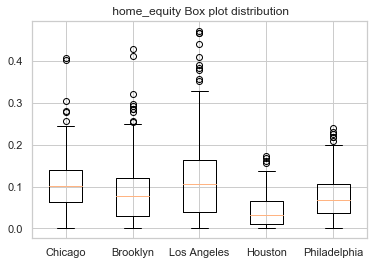

In [78]:
Chicago = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Chicago']['home_equity']
Brooklyn = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Brooklyn']['home_equity']
Los_Angeles = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Los Angeles']['home_equity']
Houston = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Houston']['home_equity']
Philadelphia = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Philadelphia']['home_equity']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([Chicago,Brooklyn,Los_Angeles,Houston,Philadelphia], labels=['Chicago', 'Brooklyn','Los Angeles','Houston','Philadelphia'])
plt.title(" home_equity Box plot distribution")



C:\Users\athan\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, ' good_debt Box plot distribution')

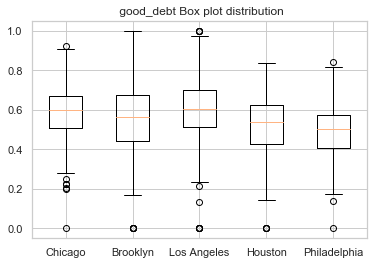

In [79]:
Chicago = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Chicago']['good_debt']
Brooklyn = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Brooklyn']['good_debt']
Los_Angeles = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Los Angeles']['good_debt']
Houston = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Houston']['good_debt']
Philadelphia = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Philadelphia']['good_debt']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([Chicago,Brooklyn,Los_Angeles,Houston,Philadelphia], labels=['Chicago', 'Brooklyn','Los Angeles','Houston','Philadelphia'])
plt.title(" good_debt Box plot distribution")


C:\Users\athan\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, ' Bad_debt Box plot distribution')

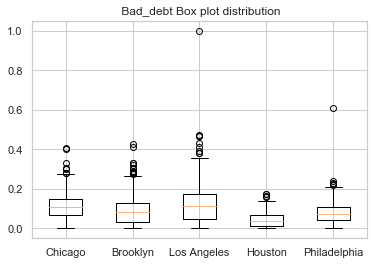

In [80]:
Chicago = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Chicago']['Bad_debt']
Brooklyn = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Brooklyn']['Bad_debt']
Los_Angeles = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Los Angeles']['Bad_debt']
Houston = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Houston']['Bad_debt']
Philadelphia = knnFinalImpuatedData[knnFinalImpuatedData['city']=='Philadelphia']['Bad_debt']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([Chicago,Brooklyn,Los_Angeles,Houston,Philadelphia], labels=['Chicago', 'Brooklyn','Los Angeles','Houston','Philadelphia'])

plt.title(" Bad_debt Box plot distribution")

Text(0.5, 1.0, 'Distribution of various type of incomes')

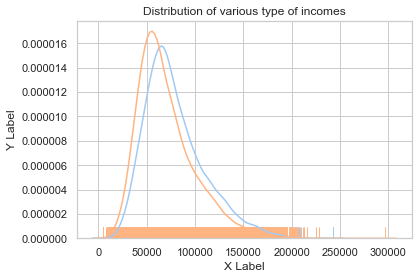

In [81]:
ax=sns.distplot(knnFinalImpuatedData[['family_mean']], hist=False, rug=True)
ax=sns.distplot(knnFinalImpuatedData[['hi_mean']], hist=False, rug=True)


ax.set(xlabel="X Label", ylabel = "Y Label")

ax.set_title("Distribution of various type of incomes")


In [82]:
# knnFinalImpuatedData['pop']


In [83]:
# knnFinalImpuatedData['ALand']


In [84]:
# knnFinalImpuatedData['pop']

In [128]:
knnFinalImpuatedData['hc_mortgage_mean'].isnull().value_counts()

False    27161
Name: hc_mortgage_mean, dtype: int64

In [85]:
 


knnFinalImpuatedData['pop_density']=np.divide(knnFinalImpuatedData['pop'] , ((knnFinalImpuatedData['ALand'] * 9.290304) /2.59e+6) ) 

In [86]:

knnFinalImpuatedData['pop_density']


0          7.211508
1        470.289898
2         27.577308
3        680.706294
4        615.217185
            ...    
27156    738.729196
27157    228.141807
27158      0.596015
27159    172.511694
27160    133.236649
Name: pop_density, Length: 27161, dtype: float64

In [87]:
#Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age 

In [88]:
# knnFinalImpuatedData[]
# male_age_median
# female_age_median
# male_pop
# female_pop

In [89]:
Age=knnFinalImpuatedData[['male_age_median','female_age_median','male_pop','female_pop']]

x=Age['male_pop']+Age['female_pop']
y=Age['male_age_median']+Age['female_age_median']
median_age=x/y

knnFinalImpuatedData['median_age']=median_age

Text(0.5, 1.0, 'Distribution of various type of age')

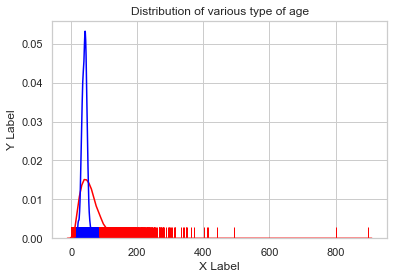

In [90]:

ax=sns.distplot(knnFinalImpuatedData[['median_age']], hist=False, rug=True,color='red')

ax=sns.distplot(knnFinalImpuatedData[['female_age_median']], hist=False, rug=True,color='blue')

ax.set(xlabel="X Label", ylabel = "Y Label")

ax.set_title("Distribution of various type of age")

In [91]:
fresh_dataFrame=pd.read_csv("train.csv").drop_duplicates()

In [92]:
fresh_dataFrame.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [130]:
fresh_dataFrame['hc_mortgage_mean'].isnull().value_counts()

False    26719
True       442
Name: hc_mortgage_mean, dtype: int64

In [93]:
obj_values=['state','state_ab', 'city', 'place','primary']

In [94]:
##we are dropping the categorical values as the standard scalar  only works on numerical data 


In [95]:

fresh_dataFrame.drop(['state','state_ab', 'city', 'place','type','primary'], axis = 1,inplace=True) 

In [96]:
 from sklearn.preprocessing import StandardScaler

In [97]:
scalar=StandardScaler()

In [98]:
freshdf_numerical=scalar.fit_transform(fresh_dataFrame)

C:\Users\athan\anaconda3\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\athan\anaconda3\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [99]:
freshdf_numerical

array([[ 0.49167242,         nan,  0.        , ..., -0.76768865,
        -0.32170018, -0.25991007],
       [-0.5100015 ,         nan,  0.        , ..., -0.8904158 ,
        -0.23203541, -0.20663869],
       [-0.54565843,         nan,  0.        , ..., -0.51254536,
        -0.14478099,  0.12671722],
       ...,
       [-1.13992498,         nan,  0.        , ..., -0.90118134,
        -0.66878961, -0.47668361],
       [ 1.41017807,         nan,  0.        , ..., -0.65868756,
        -0.47837249, -0.97886882],
       [ 0.37682992,         nan,  0.        , ..., -0.24475256,
         0.52915099,  0.67233909]])

In [100]:
freshDatafrme_scaled = pd.DataFrame(freshdf_numerical, columns = list(fresh_dataFrame.columns))

In [101]:
freshDatafrme_scaled

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,0.491672,NaN,0.0,-0.332010,0.471927,-1.244146,-1.211557,0.952696,0.966655,0.056388,...,0.709676,0.618400,0.122335,0.502533,0.375464,0.661038,0.509940,-0.767689,-0.321700,-0.259910
1,-0.510002,NaN,0.0,0.562559,-0.626597,-0.118093,-0.097194,0.748722,0.307856,-0.100445,...,-0.664851,-0.352144,0.498504,-0.987102,-0.855831,-0.523859,-1.182415,-0.890416,-0.232035,-0.206639
2,-0.545658,NaN,0.0,-0.230355,-0.626597,-0.134813,-1.202952,0.406924,0.292641,-0.047287,...,0.309775,0.305321,0.705902,0.579779,0.947730,0.941393,1.017978,-0.512545,-0.144781,0.126717
3,1.046018,NaN,0.0,0.420241,2.668976,-1.664478,0.819251,-3.423476,1.541752,-0.100801,...,1.274606,1.275866,0.860722,-0.648747,-0.602003,0.036138,-0.270761,-0.730278,0.054795,0.013823
4,-0.473735,NaN,0.0,0.765870,-0.504539,0.554967,0.810646,0.300113,-0.322648,-0.099668,...,-2.778757,-2.355848,-4.538226,4.668005,0.775127,-2.283027,-2.842714,-1.274207,-0.919465,-1.419792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27156,1.025355,NaN,0.0,-0.433666,2.668976,-1.669826,0.819251,-3.480771,1.526195,-0.101120,...,0.408272,-0.028629,1.056027,-1.116628,-1.175192,-0.169724,-1.940198,-0.455488,0.164707,0.951604
27157,0.961819,NaN,0.0,0.054281,0.838102,-1.038498,-1.641813,0.472435,0.978543,-0.097696,...,-0.367907,-0.112117,-0.149138,-0.171320,-0.158958,0.171520,0.751358,0.072293,0.272690,-1.055293
27158,-1.139925,NaN,0.0,0.013619,-1.236889,1.033920,1.606620,0.517581,-0.766004,0.932774,...,0.523465,0.743632,0.488311,-0.811501,-0.781990,0.637039,1.438470,-0.901181,-0.668790,-0.476684
27159,1.410178,NaN,0.0,3.591895,1.204277,0.877586,0.948328,-0.826070,-0.358925,-0.087084,...,-0.188152,0.378374,-0.347650,2.955905,3.326326,1.326753,1.810766,-0.658688,-0.478372,-0.978869


In [102]:
freshDatafrme_scaled.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'zip_code',
       'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop',
       'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_a

In [103]:
pd.cut(freshDatafrme_scaled['pop'],5,labels=False).unique()

array([0, 1, 4, 3, 2], dtype=int64)

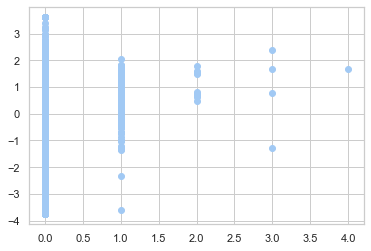

In [104]:
plt.scatter(pd.cut(freshDatafrme_scaled['pop'],5,labels=False),freshDatafrme_scaled['married'])

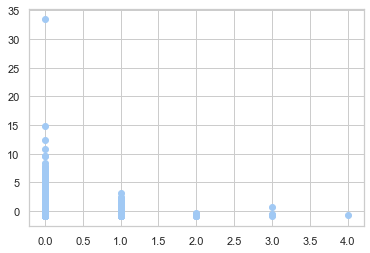

In [105]:
plt.scatter(pd.cut(freshDatafrme_scaled['pop'],5,labels=False),freshDatafrme_scaled['separated'])

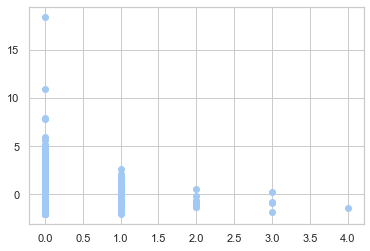

In [106]:
plt.scatter(pd.cut(freshDatafrme_scaled['pop'],5,labels=False),freshDatafrme_scaled['divorced'])

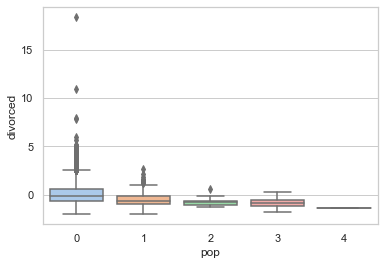

In [107]:
sns.boxplot(pd.cut(freshDatafrme_scaled['pop'],5,labels=False),freshDatafrme_scaled['divorced'])

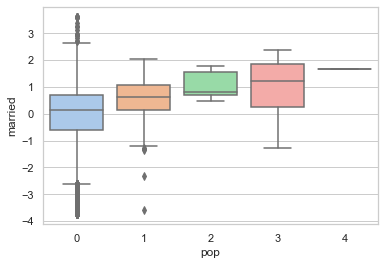

In [108]:

sns.boxplot(pd.cut(freshDatafrme_scaled['pop'],5,labels=False),freshDatafrme_scaled['married'])

In [109]:
knnFinalImpuatedData['state'].value_counts().head(5)

California      2905
Texas           1928
New York        1769
Florida         1594
Pennsylvania    1219
Name: state, dtype: int64

In [134]:
y_valuue=knnFinalImpuatedData['hc_mortgage_mean']

In [135]:
y_dataFrame=pd.DataFrame(y_valuue,columns=['hc_mortgage_mean'])

In [111]:


# sns.set(rc={'figure.figsize':(15.7,10.27)})

# sns.barplot(x='state_ab', y="rent_mean",data=knnFinalImpuatedData,hue='aland')

. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain  insight into the linear relationships in the data. Following are the list of latent variables:

In [ ]:
import pandas as pd

from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
freshDatafrme_scaled.drop(['UID', 'BLOCKID', 'SUMLEVEL'],axis=1,inplace=True)


In [ ]:
imputer_1 = KNNImputer(n_neighbors=7)


In [ ]:
freshDatafrme_scaled.shape

In [ ]:
values=imputer_1.fit_transform(freshDatafrme_scaled)

In [ ]:

values.shape

In [ ]:
freshDatafrme_knnimputed = pd.DataFrame(imputer_1.fit_transform(freshDatafrme_scaled),columns = freshDatafrme_scaled.columns)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
chi_square_value,p_value=calculate_bartlett_sphericity(freshDatafrme_knnimputed)

kmo_all,kmo_model=calculate_kmo(freshDatafrme_knnimputed)

In [ ]:
chi_square_value,p_value

In [ ]:
freshDatafrme_knnimputed_copy=freshDatafrme_knnimputed.copy()

In [ ]:
freshDatafrme_knnimputed_copy.drop(['COUNTYID', 'STATEID', 'zip_code', 'area_code'],axis=1,inplace=True)

In [ ]:
freshDatafrme_knnimputed_copy.shape

In [ ]:
fa=FactorAnalyzer(67, rotation=None)

In [ ]:
# fa = FactorAnalyzer(10, rotation=None)
fa.fit(freshDatafrme_knnimputed_copy)

In [ ]:
ev, v = fa.get_eigenvalues()

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,freshDatafrme_knnimputed_copy.shape[1]+1),ev)
plt.plot(range(1,freshDatafrme_knnimputed_copy.shape[1]+1),ev)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [ ]:
fa = FactorAnalyzer(12, rotation="varimax")
fa.fit(freshDatafrme_knnimputed_copy)

In [ ]:
fa.loadings_

In [ ]:
fa.get_communalities()

In [ ]:
loadings_FactorAnalysis= pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4','facot 5','facot 6',
                                                             'Factor 7','Factor 8' ,'Factor 9','Factor 10','Factor 11','Factor 12'],
                                      index=freshDatafrme_knnimputed_copy.columns)

print('Factor Loadings \n%s' %loadings_FactorAnalysis)

In [ ]:
freshDatafrme_knnimputed.to_csv("freshDatafrme_knnimputed.csv",index=False);

In [ ]:
hc_mortgage_mean

In [136]:
y_dataFrame.to_csv("y_dataframe.csv",index=False);